In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/ishita mishra/Downloads/fordCASE.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


# Data Cleaning And Perpetration 

In [3]:

df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [6]:
df.info

<bound method DataFrame.info of          model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0
...        ...   ...    ...          ...      ...      ...  ...   ...         ...
17961    B-MAX  2017   8999       Manual    16700   Petrol  150  47.1         1.4
17962    B-MAX  2014   7499       Manual    40700   Petrol   30  57.7         1.0
17963    Focus  2015   9999       Manual     7010   Diesel   20  67.3         1.6
17964       KA  2018   8299       Manual     5007   Petrol  145  57.7         1.2
17965    Focus  2015   8299       Manual     5007   Petrol   22  5

In [7]:
missing_val = df.isnull().sum()
missing_val

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [8]:
# Convert fuel type to a categorical variable
df['fuelType'] = df['fuelType'].astype('category')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [9]:
df.dtypes

model             object
year               int64
price              int64
transmission      object
mileage            int64
fuelType        category
tax                int64
mpg              float64
engineSize       float64
dtype: object

In [10]:
# Group by 'model' and calculate the count of cars for each model
model_popularity = df['model'].value_counts().reset_index()
model_popularity

,model,count
0,Fiesta,6557
1,Focus,4588
2,Kuga,2225
3,EcoSport,1143
4,C-MAX,543
5,Ka+,531
6,Mondeo,526
7,B-MAX,355
8,S-MAX,296
9,Grand C-MAX,247


In [11]:
# Rename columns for clarity
model_popularity.columns = ['model', 'count']

# EDA -- Exploratory Data Analysis 


# Q1. What are the most popular Ford car models based on sales and Pricing?

In [12]:
# Sort the models by the count of cars
model_popularity = model_popularity.sort_values(by = 'count', ascending=False)
model_popularity

,model,count
0,Fiesta,6557
1,Focus,4588
2,Kuga,2225
3,EcoSport,1143
4,C-MAX,543
5,Ka+,531
6,Mondeo,526
7,B-MAX,355
8,S-MAX,296
9,Grand C-MAX,247


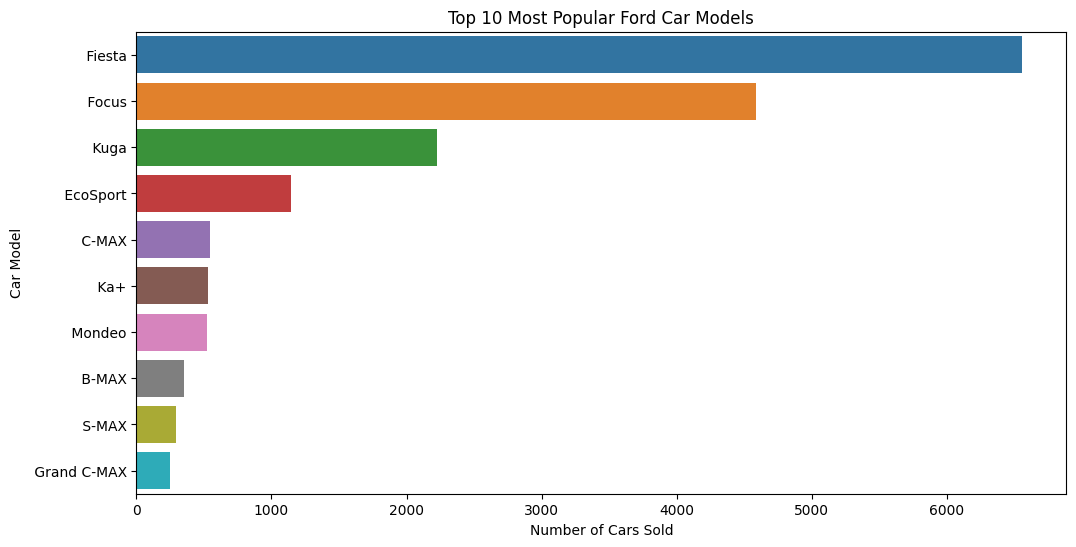

In [13]:
#Plot the top N most popular models
N = 10
plt.figure(figsize=(12, 6))
sns.barplot(data=model_popularity.head(N), x='count', y='model')
plt.title(f'Top {N} Most Popular Ford Car Models')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Car Model')
plt.show()

# The bar plot displays the top N Ford car models that have the highest number of cars sold. These models are the most popular in terms of sales volume.
# The top models stand out with a large number of units sold, while others have lower sales figures.
# The popularity of these models reflects customer preferences and demand in the market.

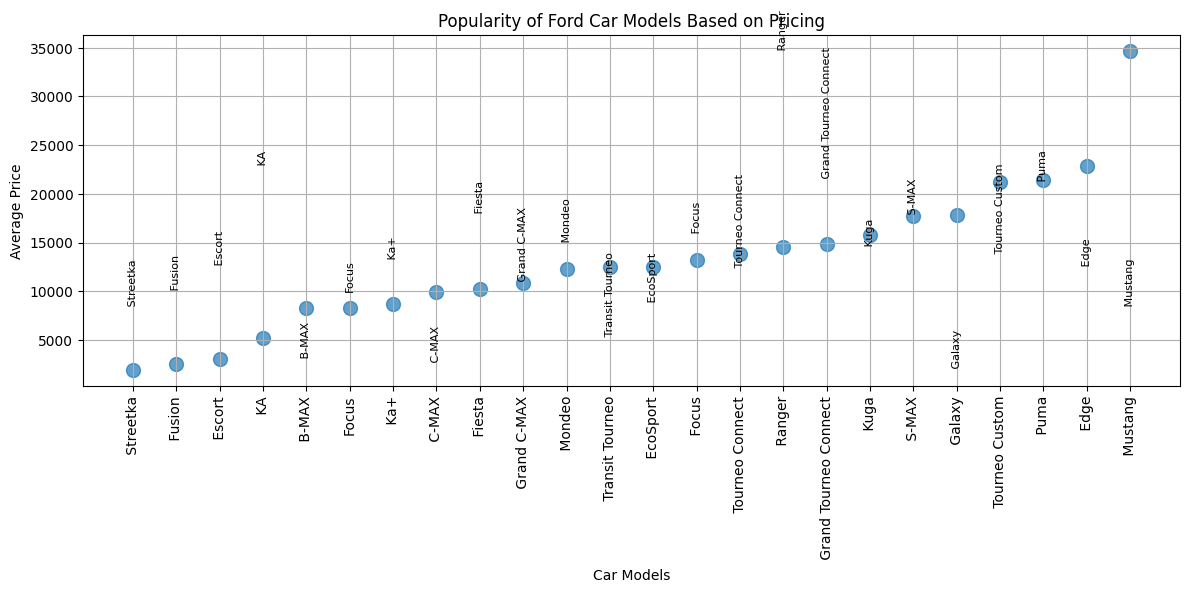

In [14]:

# Analyze Popularity Based on Pricing
pricing_by_model = df.groupby('model')['price'].mean().reset_index()
most_popular_by_pricing = pricing_by_model.sort_values(by='price', ascending=True)

# Plot a Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(most_popular_by_pricing['model'], most_popular_by_pricing['price'], s=100, alpha=0.7)

# Label points with model names
for i, model in enumerate(most_popular_by_pricing['model']):
    plt.text(model, most_popular_by_pricing['price'][i], model, fontsize=8, rotation=90, ha='center')

plt.xlabel('Car Models')
plt.ylabel('Average Price')
plt.title('Popularity of Ford Car Models Based on Pricing')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# The scatter plot illustrates a spectrum of average prices for Ford car models. Some models are priced at the lower end, while others are at the higher end, showcasing a range of pricing strategies within the Ford lineup.


# Q2. How has the demand for Ford cars changed over the years?

In [15]:
# Group by 'year' and calculate the total demand
yearly_demand = df.groupby('year')['model'].count()
yearly_demand

year
1996       1
1998       1
2000       1
2002       3
2003       3
2004       4
2005      16
2006      13
2007      32
2008      57
2009      91
2010      67
2011      94
2012     115
2013     609
2014     805
2015    1368
2016    2331
2017    4888
2018    4014
2019    3194
2020     258
2060       1
Name: model, dtype: int64

In [16]:
# years between 2000 and 2010 are the most demanded years for Ford cars and identified a specific year within that range where the demand was highest

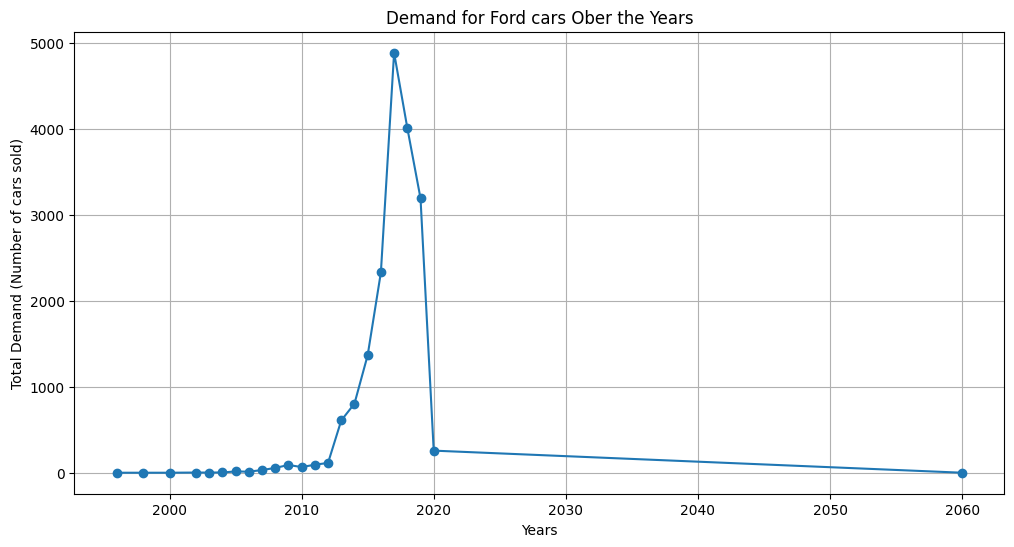

In [19]:
# Plot the demand trend over the year
plt.figure(figsize=(12,6))
yearly_demand.plot(kind = 'line', marker = 'o')
plt.title('Demand for Ford cars Ober the Years')
plt.xlabel('Years')
plt.ylabel('Total Demand (Number of cars sold)')
plt.grid(True)
plt.show()

# The line plot demonstrates the fluctuations in demand for Ford cars over the years. You can observe peaks and troughs, indicating periods of high and low demand.


# Q3. Trends in fuel type preferences for Ford cars over time?

In [20]:
# Group by 'Year' & 'fuelType' and calculating total number of cars with each type of fuel
fuelType_trends = df.groupby(['year','fuelType'])['model'].count().unstack()


<Figure size 1200x600 with 0 Axes>

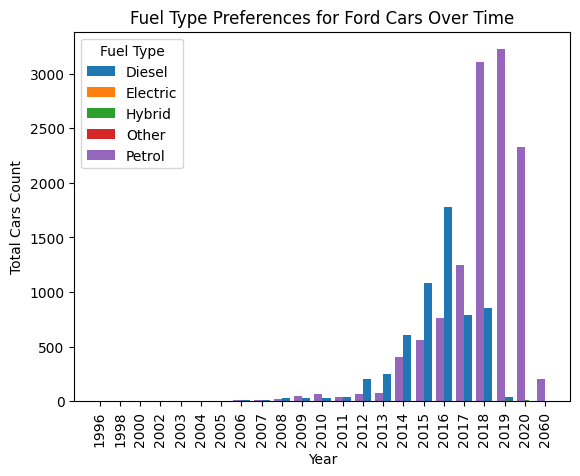

In [21]:
# plotting the trends in fuel type preferences over the year
plt.figure(figsize=(12,6))
fuelType_trends.plot(kind = 'bar', width =2)
plt.title('Fuel Type Preferences for Ford Cars Over Time')
plt.xlabel('Year')
plt.ylabel('Total Cars Count')
plt.legend(title ='Fuel Type')
plt.show()

#Petrol-powered cars are the most popular choice among Ford car buyers. This suggests that petrol engines are widely preferred for their convenience and availability.
#Your data indicates that diesel-powered cars experienced a surge in popularity during the years 2012 to 2016. This could be due to factors such as fuel efficiency or government incentives during that period.


# Q4. What factors influence the pricing of Ford cars the most (e.g., mileage, engine size)?

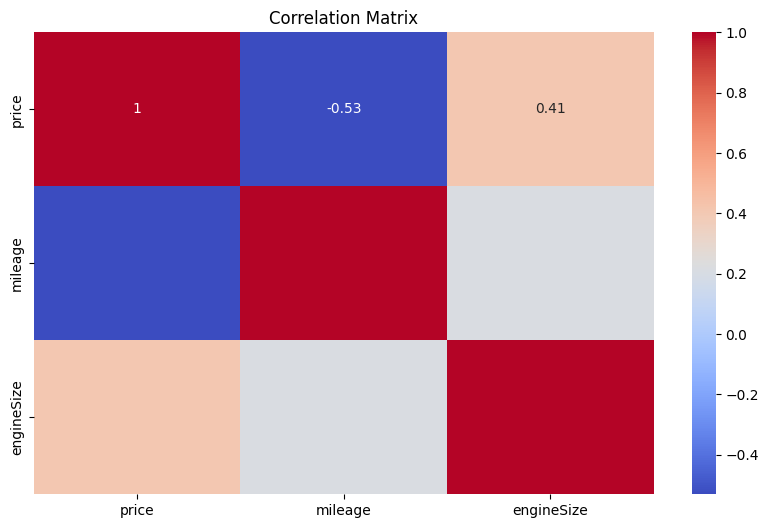

In [22]:
# To determine the factors that influence the pricing of Ford cars the most, we can calculate the correlation between 'price' and other numeric attributes like: mileage, engine size.

# Select the columns which we need to specify
num_col = ['price', 'mileage','engineSize']

# Calculate the correlation matrix
correlation_matrix = df[num_col].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot = True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. 'mileage' positively affects the price of Ford cars while 'engineSize' negatively affects the price, you can further explore these relationships and quantify their impact.
2. The negative correlation between price and mileage (-0.53) suggests that, on average, as the mileage (the number of miles a car has been driven) increases, the price tends to decrease. This is a common observation in the used car market, where older cars with higher mileage are typically priced lower.
3. The positive correlation between price and engine size (0.41) indicates that, on average, as the engine size of a Ford car increases, the price tends to increase. Larger engine sizes are often associated with more powerful and premium models, which can command higher prices.

# Q5. Is there a correlation between car engine size and fuel efficiency (mpg)?

In [24]:
correlation = df['engineSize'].corr(df['mpg'])
print(f"Correlation between Engine Size and MPG: {correlation:2f}")

Correlation between Engine Size and MPG: -0.260521


In [25]:
# This negative correlation suggests that as engine size increases, fuel efficiency tends to decrease. In other words, larger engines are associated with lower fuel efficiency.
# It's important to note that this correlation doesn't imply causation.

# Q6. How does taxation (tax) vary based on car attributes like engine size and fuel type?

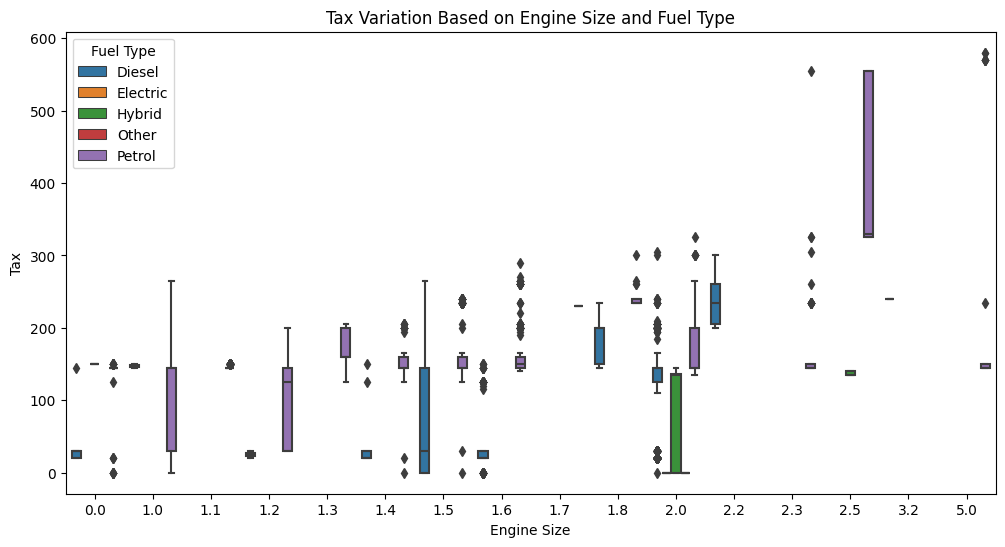

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'engineSize', y = 'tax', hue = 'fuelType')
plt.title('Tax Variation Based on Engine Size and Fuel Type')
plt.xlabel('Engine Size')
plt.ylabel('Tax')
plt.legend(title='Fuel Type')
plt.show()

#The plot also highlights the differences in tax amounts among different fuel types
# Petrol-powered cars have the largest number of boxes across various engine sizes. This suggests that a significant portion of Ford's models are powered by petrol engines.
#  Diesel-powered cars exhibit a diverse range of engine sizes, but they are notably absent in the larger engine size categories. This indicates that diesel models are more common in smaller to mid-sized engine options.
#The presence of a single large box for hybrid models with a 2.0 engine size suggests that hybrid cars, in this specific engine category, are offered by Ford. However, their number appears to be limited compared to petrol and diesel models.


# Recommendation 

1. Promote Top Models: Given the high popularity of these top-selling models, consider investing in marketing campaigns and promotional efforts to further boost their sales. Leverage their success to attract more customers.
2. Timely restocking and availability can lead to customer satisfaction.
3. Consider incorporating similar features or design elements into new models or updates to existing models.
4. Continue to offer competitive pricing for these popular models to maintain their appeal in the market. Special promotions or discounts can attract more customers.
5. For lower-priced models, offer discounts or incentives to attract price-sensitive customers. For higher-priced models, emphasize the value and quality they offer.
6.  Conduct surveys and gather feedback from customers to understand their pricing-related concerns and preferences. Use this data for fine-tuning pricing strategies.
7. Given the limited adoption of electric cars, Ford may consider enhancing its electric vehicle offerings. Educate consumers about the benefits of electric vehicles, including reduced emissions and long-term cost savings.
8. Recognize that consumer preferences vary. Some prefer the fuel efficiency and power of diesel, while others prioritize the convenience of petrol.
9. For cars with higher mileage, consider more competitive pricing to appeal to budget-conscious customers. For models with larger engine sizes, price them accordingly to reflect their performance and features.
10.  If diesel models are popular for their fuel efficiency, consider expanding the diesel model range, including larger engine sizes. This can attract customers who prefer diesel but need larger engines.
11.   If hybrid models are environmentally friendly and offer unique benefits, promote them more aggressively. Highlight the advantages of hybrid technology, such as improved fuel efficiency and reduced emissions.